# Лабораторная работа 3: Обработка признаков (часть 2).

## Загрузка и первичный анализ данных

Используем данные из соревнования [Cardiovascular Disease dataset.](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import pytz
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

# Будем использовать только обучающую выборку
data = pd.read_excel('../Lab2/ALF_Data.xlsx')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4322 non-null   int64  
 1   Gender                  4322 non-null   object 
 2   Region                  4322 non-null   object 
 3   Weight                  4322 non-null   float64
 4   Height                  4322 non-null   float64
 5   Body Mass Index         4322 non-null   float64
 6   Obesity                 4322 non-null   float64
 7   Waist                   4322 non-null   float64
 8   Maximum Blood Pressure  4322 non-null   float64
 9   Minimum Blood Pressure  4322 non-null   float64
 10  Good Cholesterol        4322 non-null   float64
 11  Bad Cholesterol         4322 non-null   float64
 12  Total Cholesterol       4322 non-null   float64
 13  Dyslipidemia            4322 non-null   int64  
 14  PVD                     4322 non-null   

In [15]:
# Нужно ли масштабирование
data.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,...,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,48.023832,79.624489,167.796020,28.213290,0.308885,96.872374,124.300787,71.684637,51.733225,152.258677,...,0.054142,0.306802,0.380379,0.242480,0.103656,0.311430,0.056918,0.018510,0.023369,0.066404
std,18.262509,19.283464,10.001444,6.140212,0.462087,15.192770,20.035094,12.169854,15.747438,42.198248,...,0.226323,0.461220,0.485536,0.428633,0.304849,0.463132,0.231713,0.134802,0.151089,0.249017
min,20.000000,34.500000,130.400000,14.420000,0.000000,58.600000,73.000000,10.000000,8.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,65.900000,160.500000,24.080000,0.000000,86.100000,110.000000,64.000000,40.000000,123.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,77.400000,167.500000,27.265000,0.000000,96.400000,121.000000,72.000000,49.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,90.100000,174.900000,31.130000,1.000000,106.200000,134.000000,79.000000,60.000000,177.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,66.440000,1.000000,173.400000,218.000000,122.000000,160.000000,560.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop(['ALF','Gender','Region','Source of Care'], axis=1)

In [119]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_data(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [120]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['ALF'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_data(X_train)
X_test_df = arr_to_data(X_test)

X_train_df.shape, X_test_df.shape

((3457, 26), (865, 26))

In [121]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

## Масштабирование признаков

### Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0)

$$ x' = \frac{x - \mu(x) }{\sigma(x)} $$

где $x$ - признак, $\mu(x)=mean(x)$ - среднее значение, $\sigma(x)=std(x)$ - среднеквадратичное отклонение.

In [20]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_data(data_cs11_scaled_temp)
data_cs11_scaled

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,0.929671,-1.225258,-0.569586,-1.124406,-0.668533,-0.873699,0.534085,-0.056263,-0.237096,2.292809,...,1.113795,-0.23925,1.503139,-0.783512,-0.565772,-0.340063,1.486942,4.070517,-0.137328,-0.154687
1,0.984435,0.221745,-0.529587,0.579316,1.495812,1.074821,-0.464278,-1.206780,-0.491135,1.392193,...,-0.897831,-0.23925,1.503139,-0.783512,-0.565772,2.940633,-0.672521,-0.245669,-0.137328,-0.154687
2,0.327275,-0.530282,-0.729581,-0.207393,-0.668533,-1.248921,-0.713869,-1.206780,1.414157,0.088671,...,-0.897831,-0.23925,1.503139,-0.783512,-0.565772,-0.340063,-0.672521,-0.245669,-0.137328,-0.154687
3,-1.206098,2.057727,2.540325,0.610263,1.495812,1.384215,0.234576,-0.138443,-0.554645,0.159772,...,-0.897831,-0.23925,-0.665274,-0.783512,1.767497,-0.340063,-0.672521,-0.245669,-0.137328,-0.154687
4,0.984435,0.283981,0.430386,0.084162,-0.668533,0.153224,0.633922,1.669512,-0.681664,-0.219434,...,-0.897831,-0.23925,-0.665274,1.276305,-0.565772,-0.340063,-0.672521,-0.245669,-0.137328,-0.154687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,1.586831,1.539088,1.800346,0.561399,1.495812,1.338135,1.232940,0.436815,-1.189742,0.870784,...,-0.897831,-0.23925,1.503139,1.276305,-0.565772,-0.340063,-0.672521,-0.245669,-0.137328,-0.154687
4318,0.053458,0.361777,0.110395,0.349655,1.495812,0.172972,0.284494,0.272456,-0.872194,-0.693443,...,1.113795,-0.23925,-0.665274,1.276305,1.767497,-0.340063,-0.672521,-0.245669,-0.137328,-0.154687
4319,-0.987045,-0.084252,0.710378,-0.441940,-0.668533,-0.505060,0.084822,0.929894,-0.745174,-0.503839,...,-0.897831,-0.23925,-0.665274,-0.783512,1.767497,-0.340063,1.486942,-0.245669,-0.137328,-0.154687
4320,1.477305,-0.042761,0.870373,-0.474516,-0.668533,0.232218,0.234576,-1.782038,0.398001,-0.432738,...,-0.897831,-0.23925,1.503139,1.276305,-0.565772,2.940633,1.486942,-0.245669,-0.137328,-0.154687


In [21]:
data_cs11_scaled.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,...,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03
mean,8.220069e-18,5.671847e-17,8.787253e-16,-6.493854e-17,1.011068e-16,-5.252624e-16,-5.178643e-17,3.320908e-16,-3.123626e-17,-3.452429e-17,...,-9.864082e-18,-4.110034e-17,-1.150810e-17,-3.288027e-17,-6.534955e-17,-1.315211e-17,-8.548871e-17,2.630422e-17,6.576055e-18,-1.644014e-17
std,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,...,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00
min,-1.534678e+00,-2.340332e+00,-3.739495e+00,-2.246647e+00,-6.685333e-01,-2.519409e+00,-2.560843e+00,-5.069229e+00,-2.777486e+00,-2.613176e+00,...,-8.978313e-01,-2.392503e-01,-6.652745e-01,-7.835119e-01,-5.657718e-01,-3.400629e-01,-6.725213e-01,-2.456691e-01,-1.373282e-01,-1.546867e-01
25%,-8.775183e-01,-7.118055e-01,-7.295811e-01,-6.732290e-01,-6.685333e-01,-7.091281e-01,-7.138694e-01,-6.315216e-01,-7.451741e-01,-6.934426e-01,...,-8.978313e-01,-2.392503e-01,-6.652745e-01,-7.835119e-01,-5.657718e-01,-3.400629e-01,-6.725213e-01,-2.456691e-01,-1.373282e-01,-1.546867e-01
50%,-1.108317e-01,-1.153707e-01,-2.960119e-02,-1.544572e-01,-6.685333e-01,-3.109562e-02,-1.647693e-01,2.591648e-02,-1.735864e-01,-7.723196e-02,...,-8.978313e-01,-2.392503e-01,-6.652745e-01,-7.835119e-01,-5.657718e-01,-3.400629e-01,-6.725213e-01,-2.456691e-01,-1.373282e-01,-1.546867e-01
75%,8.201448e-01,5.433009e-01,7.103776e-01,4.750728e-01,1.495812e+00,6.140227e-01,4.841672e-01,6.011748e-01,5.250207e-01,5.863795e-01,...,1.113795e+00,-2.392503e-01,1.503139e+00,1.276305e+00,-5.657718e-01,-3.400629e-01,1.486942e+00,-2.456691e-01,-1.373282e-01,-1.546867e-01
max,2.024938e+00,5.895656e+00,3.230305e+00,6.226354e+00,1.495812e+00,5.037691e+00,4.677295e+00,4.134905e+00,6.875995e+00,9.663636e+00,...,1.113795e+00,4.179723e+00,1.503139e+00,1.276305e+00,1.767497e+00,2.940633e+00,1.486942e+00,4.070517e+00,7.281827e+00,6.464679e+00


In [125]:
# Построение плотности распределения
def draw_kde(col_list, data1, data2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=data1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=data2[col_list], ax=ax2)
    plt.show()

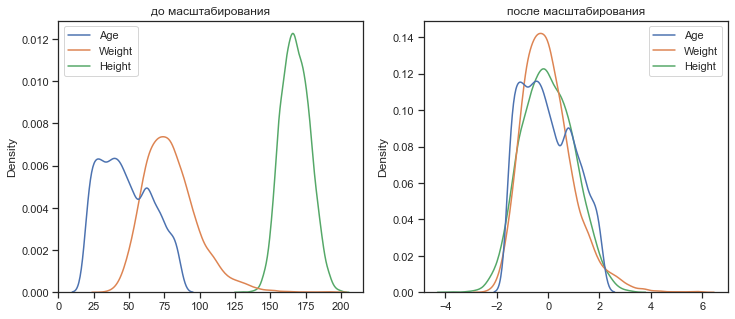

In [23]:
draw_kde(['Age', 'Weight', 'Height'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [24]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [25]:
data_cs12_scaled_train.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,...,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3457.000000
mean,1.279470e-16,-1.932051e-16,-1.520977e-15,1.079071e-16,2.671986e-17,-1.438762e-16,-3.391367e-17,-1.413070e-16,-1.027687e-16,-1.500423e-16,...,-3.596904e-17,-7.707652e-17,2.466449e-17,9.968563e-17,3.391367e-17,-3.288598e-17,6.679965e-17,-6.782734e-17,3.083061e-17,0.000000
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145
min,-1.526976e+00,-2.334368e+00,-3.734176e+00,-2.237583e+00,-6.659007e-01,-2.464188e+00,-2.398918e+00,-5.101896e+00,-2.557912e+00,-2.567953e+00,...,-9.052479e-01,-2.444980e-01,-6.559615e-01,-7.796839e-01,-5.563000e-01,-3.313478e-01,-6.704296e-01,-2.497694e-01,-1.395109e-01,-0.153914
25%,-8.690163e-01,-7.107876e-01,-7.196670e-01,-6.695679e-01,-6.659007e-01,-6.983433e-01,-7.064161e-01,-6.413480e-01,-7.488486e-01,-6.779098e-01,...,-9.052479e-01,-2.444980e-01,-6.559615e-01,-7.796839e-01,-5.563000e-01,-3.313478e-01,-6.704296e-01,-2.497694e-01,-1.395109e-01,-0.153914
50%,-1.562266e-01,-1.213348e-01,-3.092141e-02,-1.474368e-01,-6.659007e-01,-2.626821e-02,-1.588421e-01,1.947389e-02,-1.673640e-01,-7.979480e-02,...,-9.052479e-01,-2.444980e-01,-6.559615e-01,-7.796839e-01,-5.563000e-01,-3.313478e-01,-6.704296e-01,-2.497694e-01,-1.395109e-01,-0.153914
75%,8.307130e-01,5.353362e-01,6.977514e-01,4.687427e-01,1.501725e+00,5.996841e-01,4.882908e-01,5.976931e-01,5.433395e-01,5.661694e-01,...,1.104670e+00,-2.444980e-01,1.524480e+00,1.282571e+00,-5.563000e-01,-3.313478e-01,1.491581e+00,-2.497694e-01,-1.395109e-01,-0.153914
max,2.036972e+00,5.876605e+00,3.223152e+00,6.197591e+00,1.501725e+00,5.047240e+00,4.321309e+00,3.901803e+00,7.004279e+00,9.753215e+00,...,1.104670e+00,4.090013e+00,1.524480e+00,1.282571e+00,1.797591e+00,3.017977e+00,1.491581e+00,4.003693e+00,7.167900e+00,6.497115


In [26]:
data_cs12_scaled_test.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,0.047817,-0.005716,-0.006861,-0.004827,0.018217,0.024265,0.027327,-0.032857,0.046108,-0.009155,...,-0.040867,-0.049069,0.064971,0.023761,0.072311,0.079090,0.014415,-0.038326,-0.021241,0.007556
std,1.005739,0.985287,0.991581,0.978046,1.008003,1.004992,0.986302,1.025631,1.083597,1.046984,...,0.995654,0.899907,1.026365,1.006258,1.042010,1.098920,1.006380,0.925013,0.922630,1.024247
min,-1.526976,-2.018959,-2.735995,-1.803014,-0.665901,-2.516899,-2.548256,-5.101896,-2.816349,-2.639727,...,-0.905248,-0.244498,-0.655961,-0.779684,-0.556300,-0.331348,-0.670430,-0.249769,-0.139511,-0.153914
25%,-0.759356,-0.710788,-0.779558,-0.674432,-0.665901,-0.711521,-0.656637,-0.641348,-0.684239,-0.725759,...,-0.905248,-0.244498,-0.655961,-0.779684,-0.556300,-0.331348,-0.670430,-0.249769,-0.139511,-0.153914
50%,-0.101397,-0.095482,-0.070849,-0.162031,-0.665901,-0.013090,-0.109063,0.019474,-0.167364,-0.103719,...,-0.905248,-0.244498,-0.655961,-0.779684,-0.556300,-0.331348,-0.670430,-0.249769,-0.139511,-0.153914
75%,0.885543,0.550848,0.757642,0.476850,1.501725,0.691930,0.538070,0.597693,0.607949,0.661868,...,1.104670,-0.244498,1.524480,1.282571,1.797591,-0.331348,1.491581,-0.249769,-0.139511,-0.153914
max,2.036972,4.108247,2.694115,5.425745,1.501725,4.230207,4.669765,4.149611,5.841310,5.087918,...,1.104670,4.090013,1.524480,1.282571,1.797591,3.017977,1.491581,4.003693,7.167900,6.497115


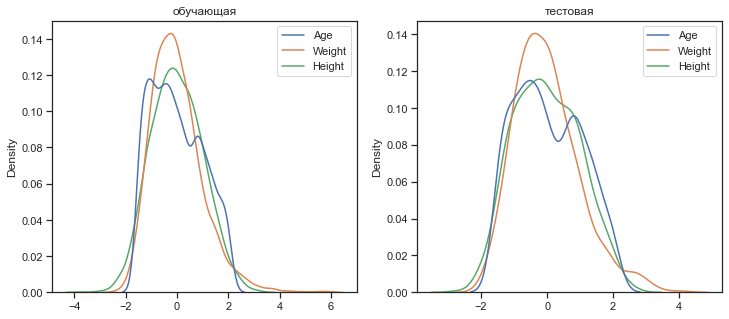

In [27]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Age', 'Weight', 'Height'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование "Mean Normalisation"

$$ x' = \frac{x - \mu(x) }{max(x)-min(x)} $$

где $x$ - признак, $\mu(x)=mean(x)$ - среднее значение.

In [28]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [29]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,...,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,0.002685,-0.000139,-0.000197,-0.000115,0.001682,0.000647,0.000814,-0.000730,0.000965,-0.000149,...,-0.004069,-0.002266,0.005964,0.002306,0.006148,0.004726,0.001334,-0.001803,-0.000582,0.000227
std,0.280962,0.121432,0.143493,0.118036,0.462087,0.133270,0.148408,0.111650,0.106402,0.081938,...,0.497168,0.226323,0.461220,0.485536,0.428633,0.304849,0.463132,0.231713,0.134802,0.151089
min,-0.428451,-0.284299,-0.536726,-0.265268,-0.307203,-0.335076,-0.379192,-0.566644,-0.294530,-0.214243,...,-0.450391,-0.056407,-0.300839,-0.378073,-0.236332,-0.098930,-0.310095,-0.058721,-0.019092,-0.023141
25%,-0.243835,-0.086566,-0.104875,-0.079570,-0.307203,-0.093848,-0.105118,-0.071232,-0.078313,-0.056962,...,-0.450391,-0.056407,-0.300839,-0.378073,-0.236332,-0.098930,-0.310095,-0.058721,-0.019092,-0.023141
50%,-0.028451,-0.014147,-0.004444,-0.018344,-0.307203,-0.003497,-0.023636,0.002163,-0.017503,-0.006476,...,-0.450391,-0.056407,-0.300839,-0.378073,-0.236332,-0.098930,-0.310095,-0.058721,-0.019092,-0.023141
75%,0.233088,0.065827,0.101725,0.055954,0.692797,0.082468,0.072660,0.066383,0.056822,0.047893,...,0.549609,-0.056407,0.699161,0.621927,-0.236332,-0.098930,0.689905,-0.058721,-0.019092,-0.023141
max,0.571549,0.715701,0.463274,0.734732,0.692797,0.671941,0.694882,0.460878,0.732497,0.791582,...,0.549609,0.943593,0.699161,0.621927,0.763668,0.901070,0.689905,0.941279,0.980908,0.976859


In [30]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [31]:
data_cs22_scaled_train.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,...,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03,3.457000e+03
mean,4.303439e-17,-2.325142e-17,-2.186404e-16,1.291032e-17,1.335993e-17,-1.901221e-17,-5.523817e-18,-1.380954e-17,-1.104763e-17,-1.258916e-17,...,-4.110748e-18,8.671108e-18,1.233224e-17,5.112742e-17,-2.569217e-18,1.438762e-17,4.162132e-17,1.079071e-17,1.027687e-18,-5.138435e-18
std,2.806283e-01,1.218059e-01,1.437541e-01,1.185684e-01,4.614009e-01,1.331497e-01,1.488260e-01,1.110815e-01,1.045937e-01,8.117288e-02,...,4.976048e-01,2.307399e-01,4.586891e-01,4.849762e-01,4.248899e-01,2.986108e-01,4.625994e-01,2.351366e-01,1.368672e-01,1.503744e-01
min,-4.284506e-01,-2.842986e-01,-5.367256e-01,-2.652681e-01,-3.072028e-01,-3.280585e-01,-3.569698e-01,-5.666445e-01,-2.675027e-01,-2.084180e-01,...,-4.503905e-01,-5.640729e-02,-3.008389e-01,-3.780735e-01,-2.363321e-01,-9.892971e-02,-3.100955e-01,-5.872143e-02,-1.909170e-02,-2.314145e-02
25%,-2.438353e-01,-8.656557e-02,-1.034401e-01,-7.937808e-02,-3.072028e-01,-9.297078e-02,-1.051179e-01,-7.123162e-02,-7.831349e-02,-5.501993e-02,...,-4.503905e-01,-5.640729e-02,-3.008389e-01,-3.780735e-01,-2.363321e-01,-9.892971e-02,-3.100955e-01,-5.872143e-02,-1.909170e-02,-2.314145e-02
50%,-4.383525e-02,-1.477716e-02,-4.444437e-03,-1.747881e-02,-3.072028e-01,-3.497100e-03,-2.363642e-02,2.162877e-03,-1.750268e-02,-6.476236e-03,...,-4.503905e-01,-5.640729e-02,-3.008389e-01,-3.780735e-01,-2.363321e-01,-9.892971e-02,-3.100955e-01,-5.872143e-02,-1.909170e-02,-2.314145e-02
75%,2.330878e-01,6.519765e-02,1.002901e-01,5.557001e-02,6.927972e-01,7.983623e-02,7.265987e-02,6.638306e-02,5.682165e-02,4.595095e-02,...,5.496095e-01,-5.640729e-02,6.991611e-01,6.219265e-01,-2.363321e-01,-9.892971e-02,6.899045e-01,-5.872143e-02,-1.909170e-02,-2.314145e-02
max,5.715494e-01,7.157014e-01,4.632744e-01,7.347319e-01,6.927972e-01,6.719415e-01,6.430302e-01,4.333555e-01,7.324973e-01,7.915820e-01,...,5.496095e-01,9.435927e-01,6.991611e-01,6.219265e-01,7.636679e-01,9.010703e-01,6.899045e-01,9.412786e-01,9.809083e-01,9.768585e-01


In [32]:
data_cs22_scaled_test.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,0.013417,-0.000696,-0.000986,-0.000572,0.008404,0.003230,0.004066,-0.003649,0.004822,-0.000743,...,-0.020333,-0.011321,0.029797,0.011522,0.030720,0.023614,0.006668,-0.009010,-0.002907,0.001136
std,0.282198,0.119996,0.142523,0.115949,0.465026,0.133795,0.146766,0.113912,0.113321,0.084974,...,0.495370,0.207614,0.470714,0.487941,0.442676,0.328102,0.465483,0.217473,0.126259,0.153998
min,-0.428451,-0.245885,-0.393254,-0.213749,-0.307203,-0.335076,-0.379192,-0.566644,-0.294530,-0.214243,...,-0.450391,-0.056407,-0.300839,-0.378073,-0.236332,-0.098930,-0.310095,-0.058721,-0.019092,-0.023141
25%,-0.213066,-0.086566,-0.112048,-0.079955,-0.307203,-0.094725,-0.097710,-0.071232,-0.071557,-0.058903,...,-0.450391,-0.056407,-0.300839,-0.378073,-0.236332,-0.098930,-0.310095,-0.058721,-0.019092,-0.023141
50%,-0.028451,-0.011629,-0.010183,-0.019209,-0.307203,-0.001743,-0.016229,0.002163,-0.017503,-0.008418,...,-0.450391,-0.056407,-0.300839,-0.378073,-0.236332,-0.098930,-0.310095,-0.058721,-0.019092,-0.023141
75%,0.248472,0.067087,0.108898,0.056531,0.692797,0.092117,0.080067,0.066383,0.063578,0.053718,...,0.549609,-0.056407,0.699161,0.621927,0.763668,-0.098930,0.689905,-0.058721,-0.019092,-0.023141
max,0.571549,0.500336,0.387234,0.643229,0.692797,0.563170,0.694882,0.460878,0.610876,0.412941,...,0.549609,0.943593,0.699161,0.621927,0.763668,0.901070,0.689905,0.941279,0.980908,0.976859


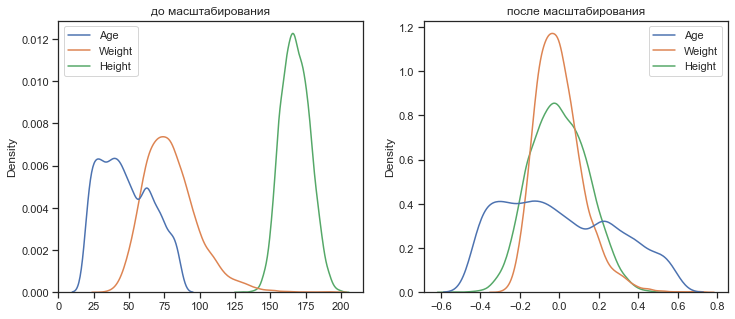

In [33]:
draw_kde(['Age', 'Weight', 'Height'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

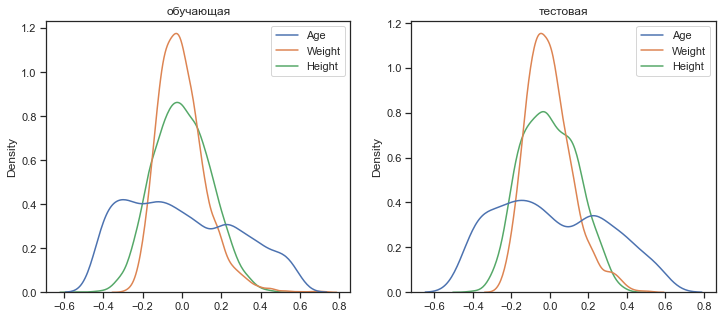

In [34]:
draw_kde(['Age', 'Weight', 'Height'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax-масштабирование

$$ x' = \frac{x - min(x)}{max(x)-min(x)} $$

In [35]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,...,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,0.431136,0.284159,0.536528,0.265154,0.308885,0.333383,0.353799,0.550756,0.287719,0.212855,...,0.446321,0.054142,0.306802,0.380379,0.242480,0.103656,0.311430,0.056918,0.018510,0.023369
std,0.280962,0.121432,0.143493,0.118036,0.462087,0.132341,0.138173,0.108659,0.103602,0.081464,...,0.497168,0.226323,0.461220,0.485536,0.428633,0.304849,0.463132,0.231713,0.134802,0.151089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184615,0.197733,0.431851,0.185698,0.000000,0.239547,0.255172,0.482143,0.210526,0.156371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.270151,0.532281,0.246924,0.000000,0.329268,0.331034,0.553571,0.269737,0.206564,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.661538,0.350126,0.638451,0.321223,1.000000,0.414634,0.420690,0.616071,0.342105,0.260618,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

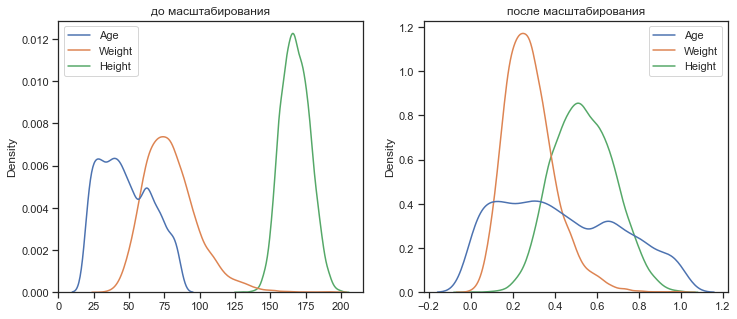

In [37]:
draw_kde(['Age', 'Weight', 'Height'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

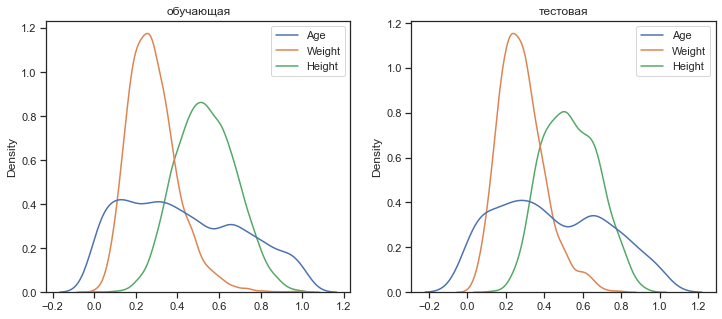

In [38]:
draw_kde(['Age', 'Weight', 'Height'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

### Масштабирование по медиане 

$$ x' = \frac{x - median(x)}{IQR} $$

где

$$ IQR = Q3(x) - Q1(x) $$

$IQR -$ разность между 1 и 3 квартилями.

In [122]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,...,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,0.065285,0.091921,0.020557,0.134509,0.308885,0.023501,0.137533,-0.021024,0.136661,0.060346,...,0.446321,0.054142,0.306802,0.380379,0.242480,0.103656,0.311430,0.056918,0.018510,0.023369
std,0.589113,0.796837,0.694545,0.870952,0.462087,0.755859,0.834796,0.811324,0.787372,0.781449,...,0.497168,0.226323,0.461220,0.485536,0.428633,0.304849,0.463132,0.231713,0.134802,0.151089
min,-0.838710,-1.772727,-2.576389,-1.821986,0.000000,-1.880597,-2.000000,-4.133333,-2.050000,-1.981481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.451613,-0.475207,-0.486111,-0.451773,0.000000,-0.512438,-0.458333,-0.533333,-0.450000,-0.481481,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.548387,0.524793,0.513889,0.548227,1.000000,0.487562,0.541667,0.466667,0.550000,0.518519,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.258065,4.789256,2.263889,5.556738,1.000000,3.830846,4.041667,3.333333,5.550000,7.611111,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

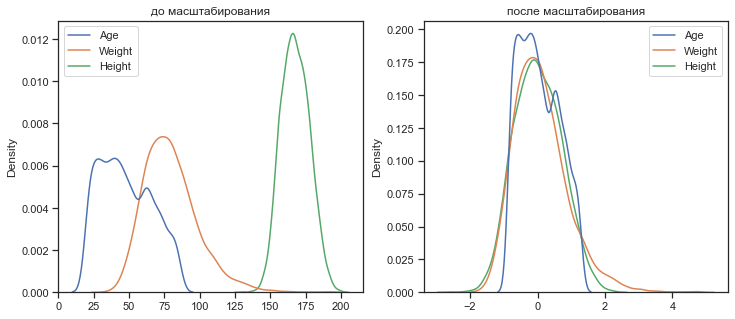

In [126]:
draw_kde(['Age', 'Weight', 'Height'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

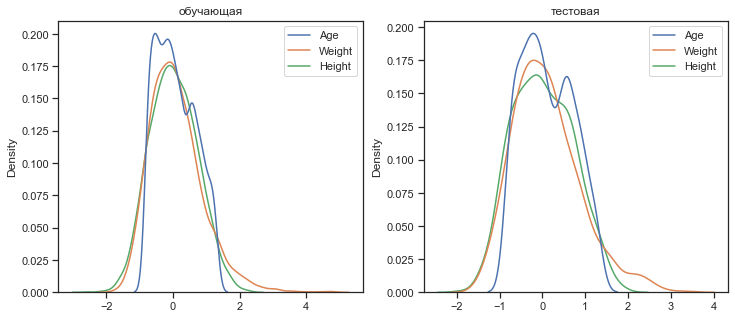

In [127]:
draw_kde(['Age', 'Weight', 'Height'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

### Масштабирование по максимальному значению

$$ x' = \frac{x}{max(|x|)} $$

In [43]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
count,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,...,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,0.564986,0.411922,0.838561,0.424643,0.308885,0.558664,0.570187,0.587579,0.323333,0.271890,...,0.446321,0.054142,0.306802,0.380379,0.242480,0.103656,0.311430,0.056918,0.018510,0.023369
std,0.214853,0.099759,0.049982,0.092417,0.462087,0.087617,0.091904,0.099753,0.098421,0.075354,...,0.497168,0.226323,0.461220,0.485536,0.428633,0.304849,0.463132,0.231713,0.134802,0.151089
min,0.235294,0.178479,0.651674,0.217038,0.000000,0.337947,0.334862,0.081967,0.050000,0.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376471,0.340921,0.802099,0.362432,0.000000,0.496540,0.504587,0.524590,0.250000,0.219643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541176,0.400414,0.837081,0.410370,0.000000,0.555940,0.555046,0.590164,0.306250,0.266071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.741176,0.466115,0.874063,0.468543,1.000000,0.612457,0.614679,0.647541,0.375000,0.316071,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

/Users/ctmh/miniforge3/envs/pytorch/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(
/Users/ctmh/miniforge3/envs/pytorch/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


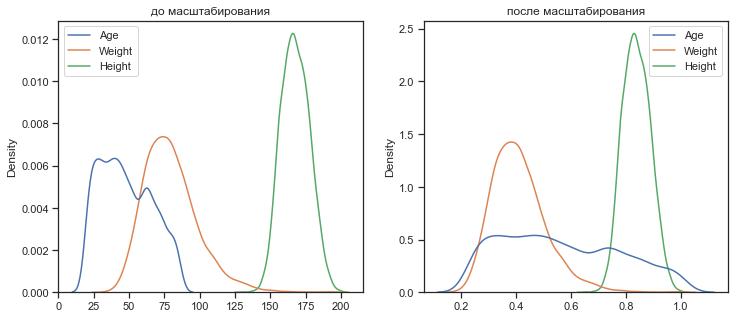

In [45]:
draw_kde(['Age', 'Weight', 'Height'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

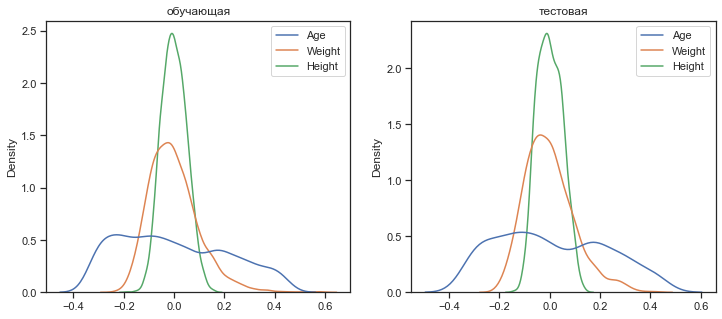

In [46]:
draw_kde(['Age', 'Weight', 'Height'], data_cs52_scaled_train, data_cs52_scaled_test, 'обучающая', 'тестовая')

## Обработку выбросов для числовых признаков
(по одному способу для удаления выбросов и для замены выбросов)

Существует [ГОСТ Р ИСО 16269-4-2017 Статистические методы. Статистическое представление данных. Часть 4. Выявление и обработка выбросов](http://docs.cntd.ru/document/1200146680) посвященный обработке выбросов.

В соответствии с ГОСТ, **выброс (outlier)** - это элемент маломощного подмножества выборки, существенно отличающийся от остальных элементов выборки.

In [47]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

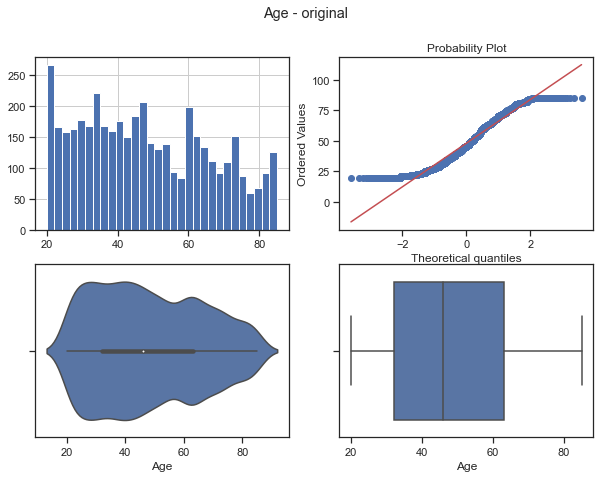

In [48]:
diagnostic_plots(data, 'Age', 'Age - original')

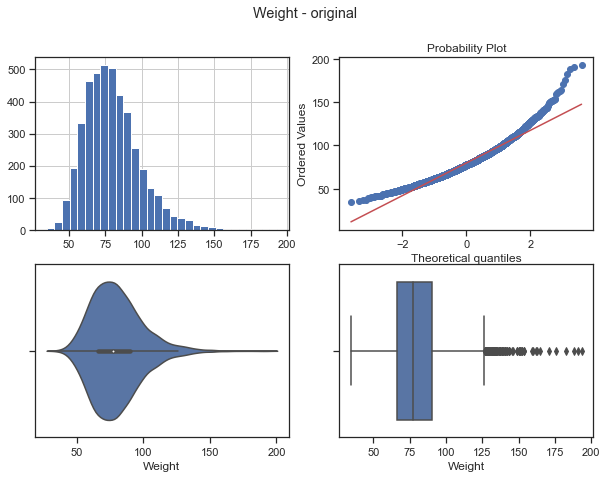

In [49]:
diagnostic_plots(data, 'Weight', 'Weight - original')

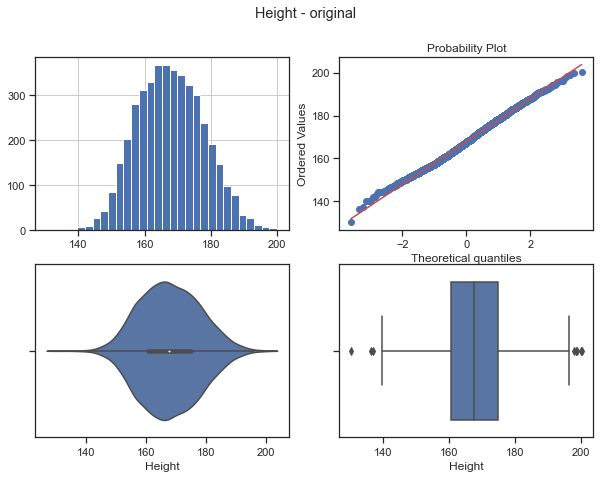

In [50]:
diagnostic_plots(data, 'Height', 'Height - original')

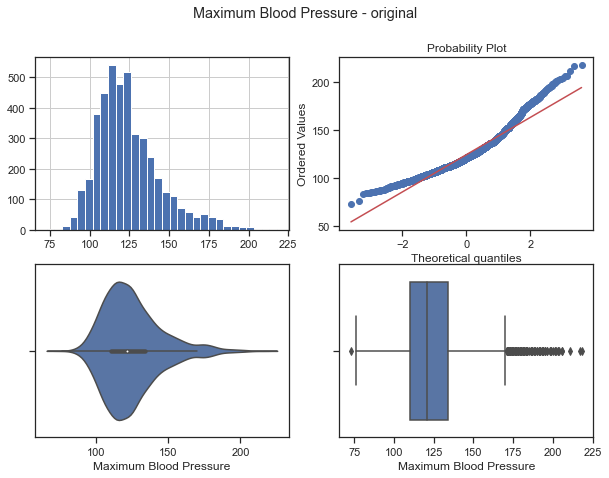

In [51]:
diagnostic_plots(data, 'Maximum Blood Pressure', 'Maximum Blood Pressure - original')

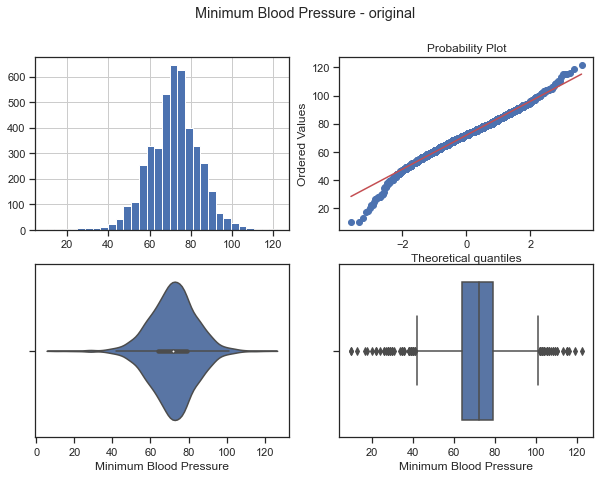

In [52]:
diagnostic_plots(data, 'Minimum Blood Pressure', 'Minimum Blood Pressure - original')

### Использование межквартильного размаха

Межквартильный размах IQR (interquartile range, IQR) - это разность третьего квартиля и первого квартиля:

$$ IQR = Q3(x) - Q1(x) $$

Тогда:

$$  outlier < Q1(x) - K \cdot IQR $$
$$  outlier > Q3(x) + K \cdot IQR $$

Значение $K$ обычно выбирается равным $1,5$.

In [54]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

### Удаление выбросов

In [53]:
data.shape

(4322, 30)

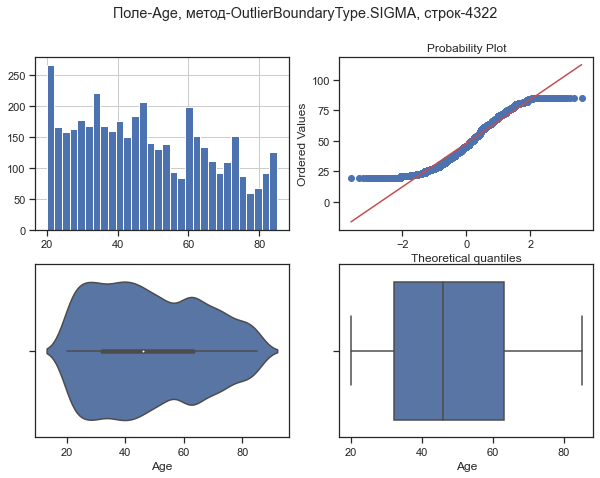

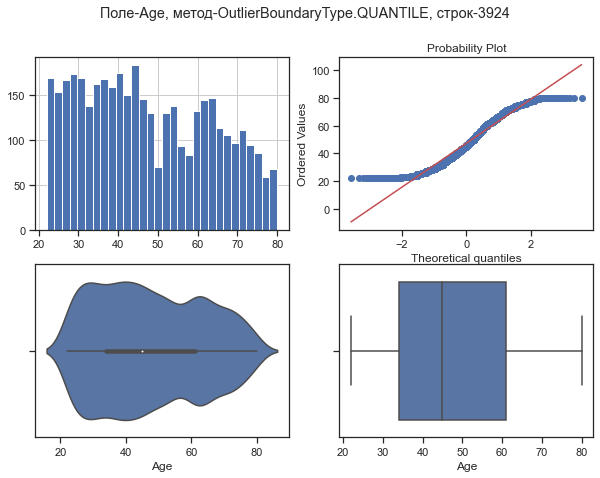

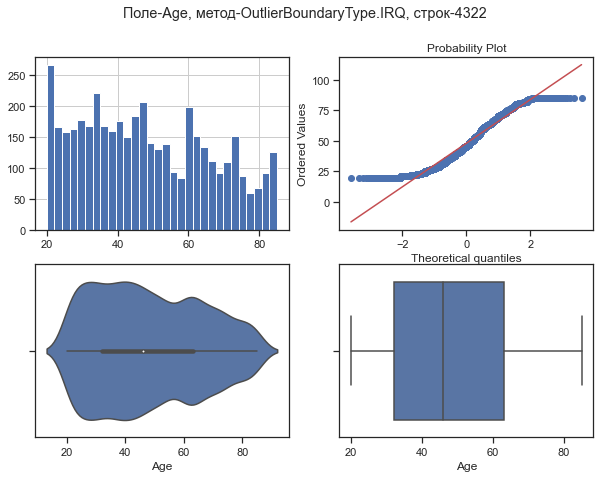

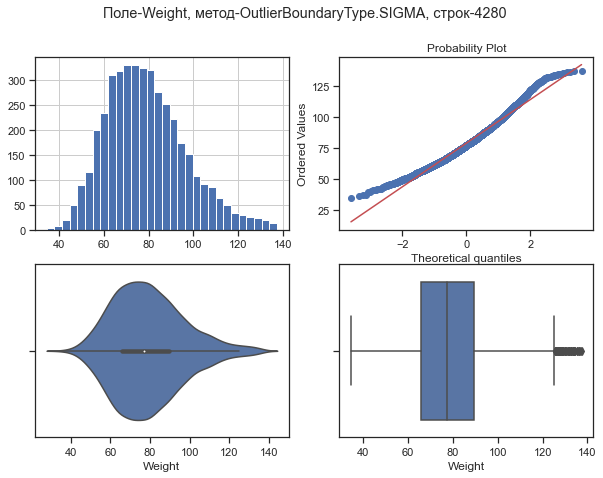

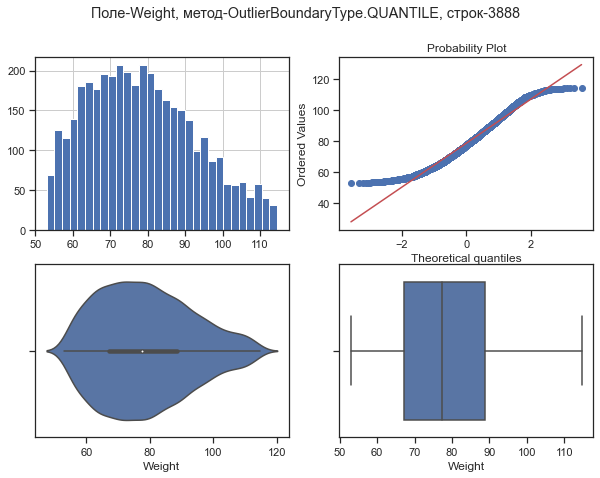

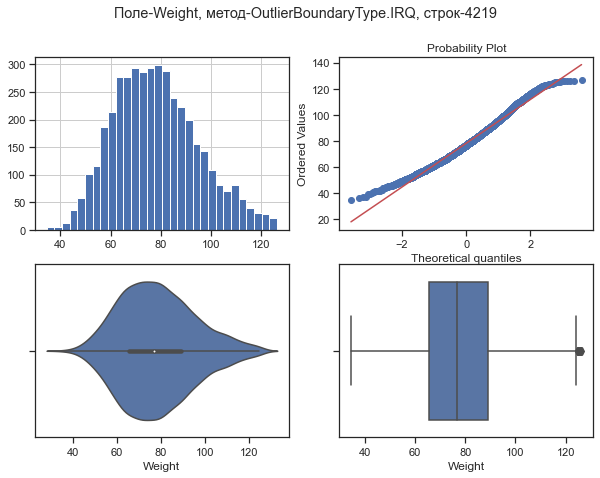

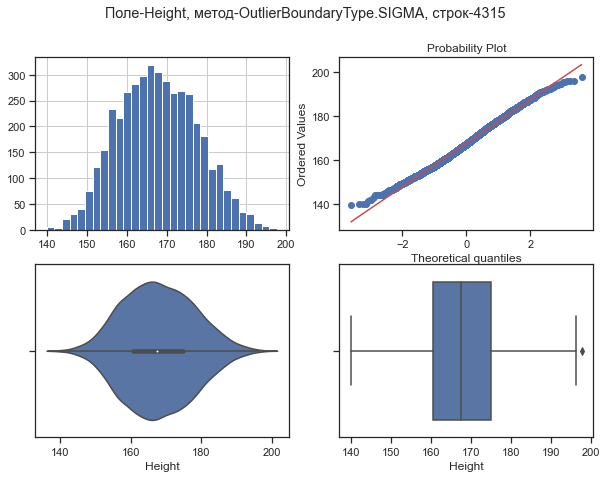

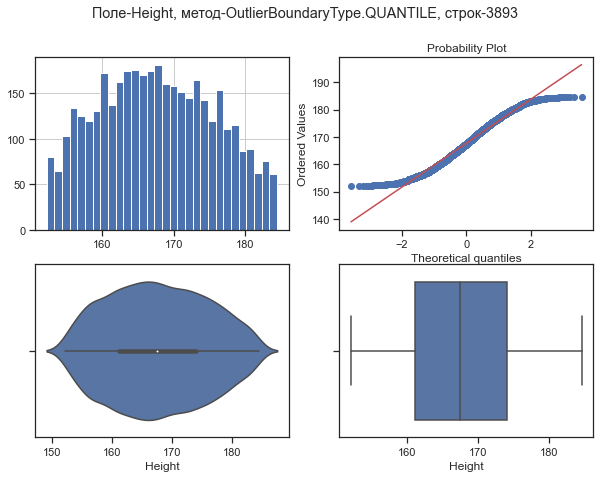

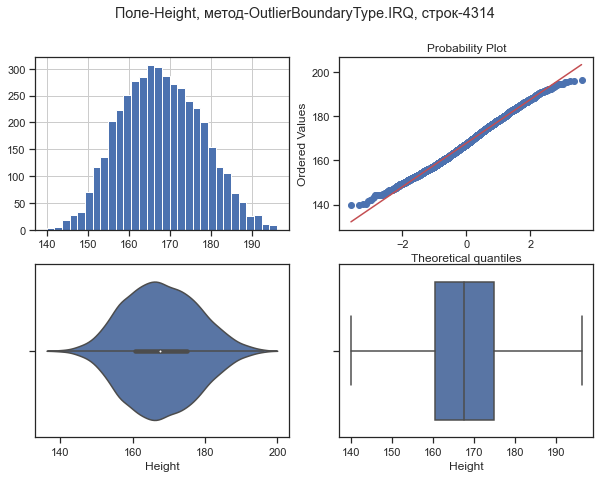

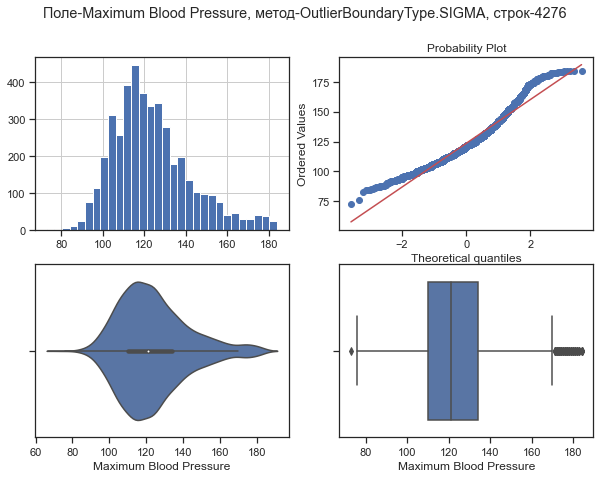

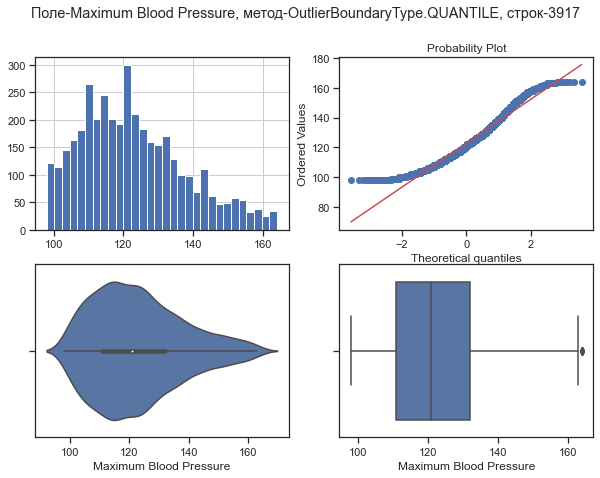

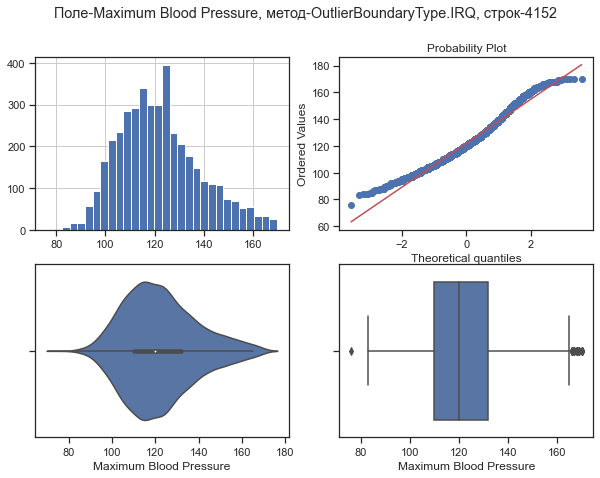

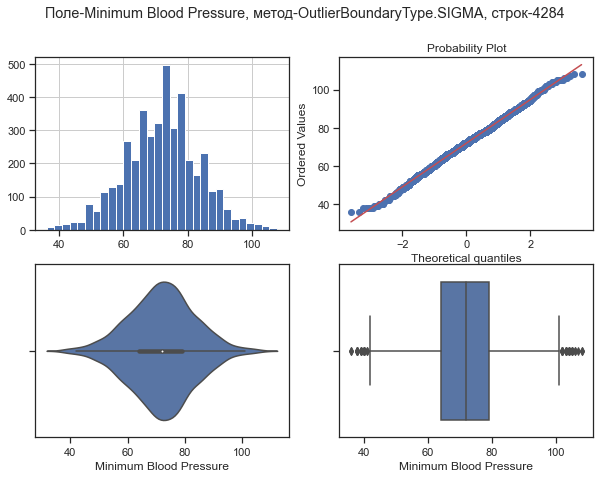

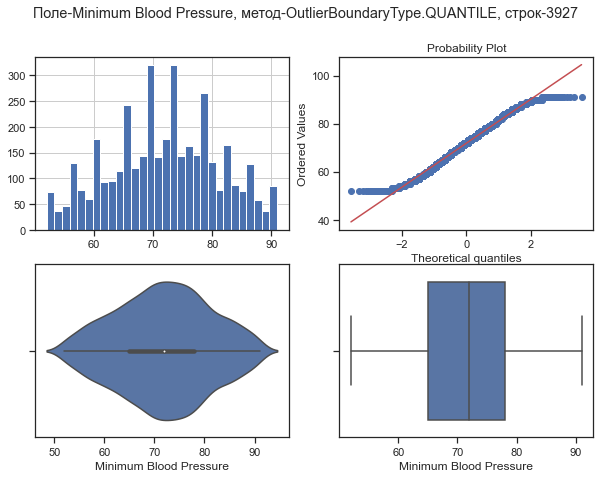

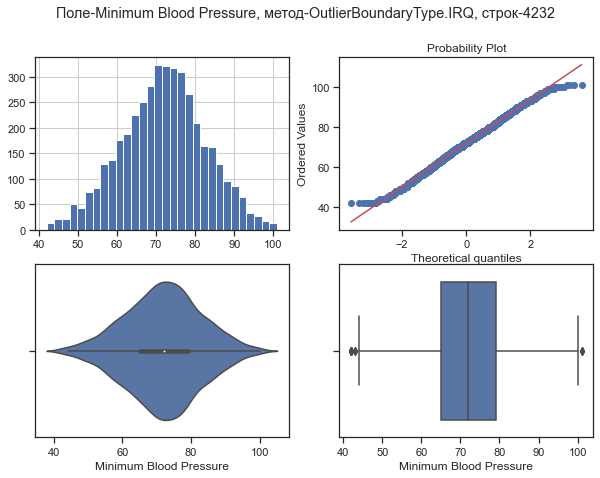

In [57]:
x_col_list=['Age', 'Weight', 'Height', 'Maximum Blood Pressure', 'Minimum Blood Pressure']
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов

Для замены используем найденные верхнюю и нижнюю границы.

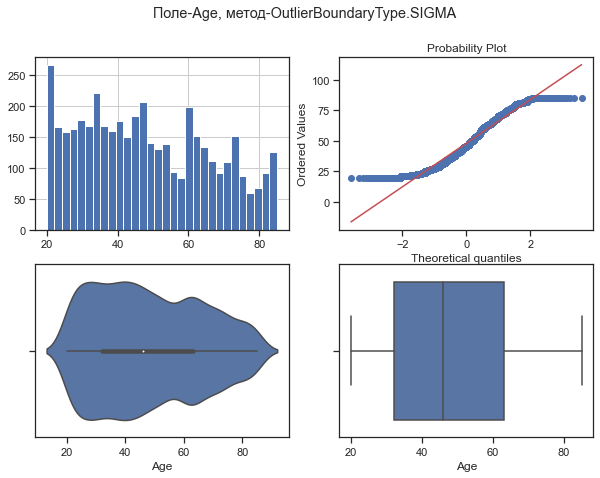

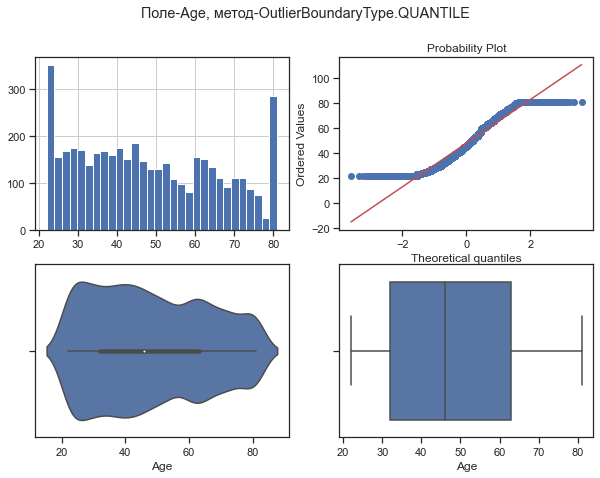

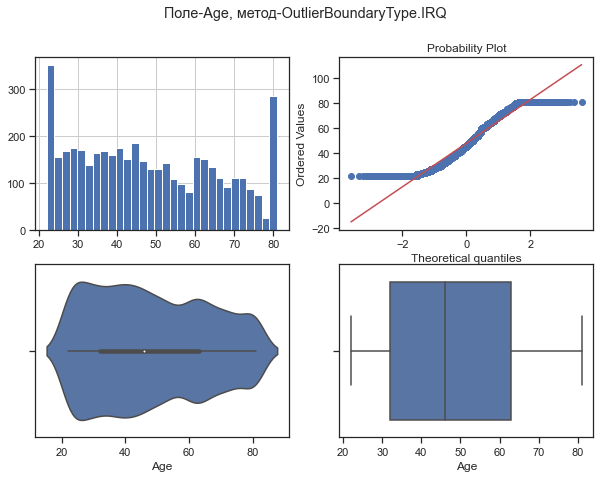

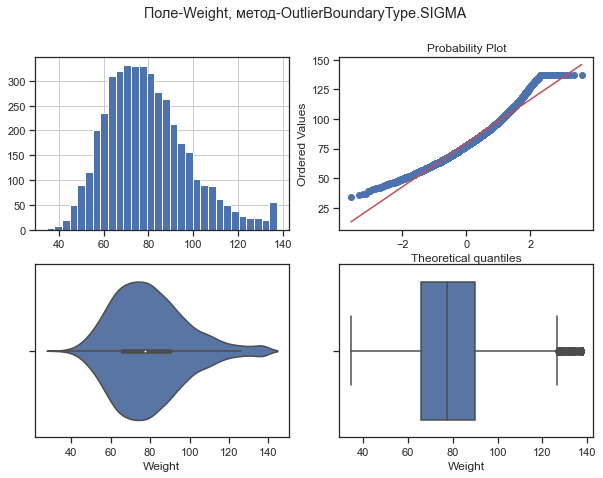

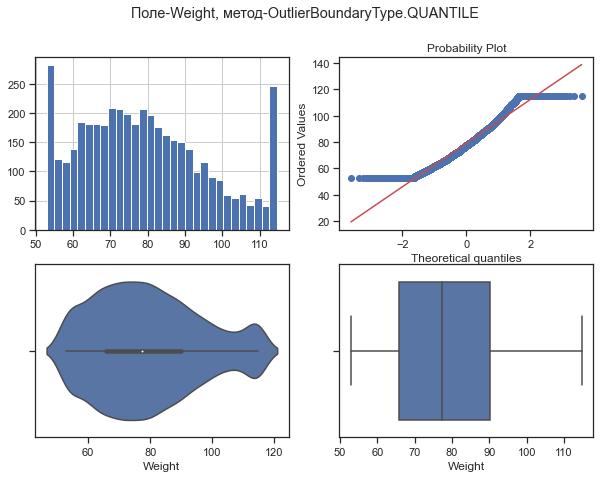

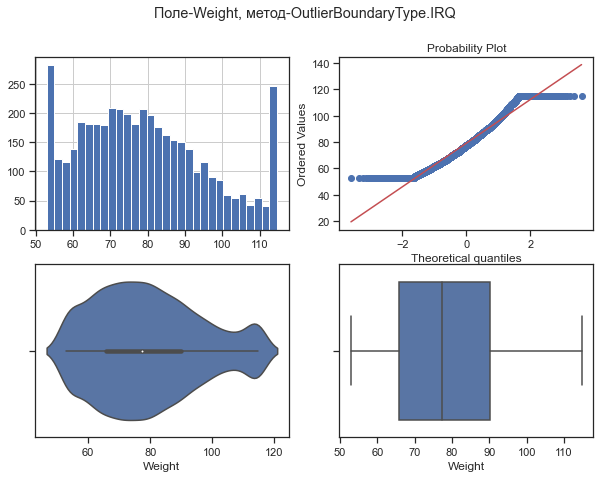

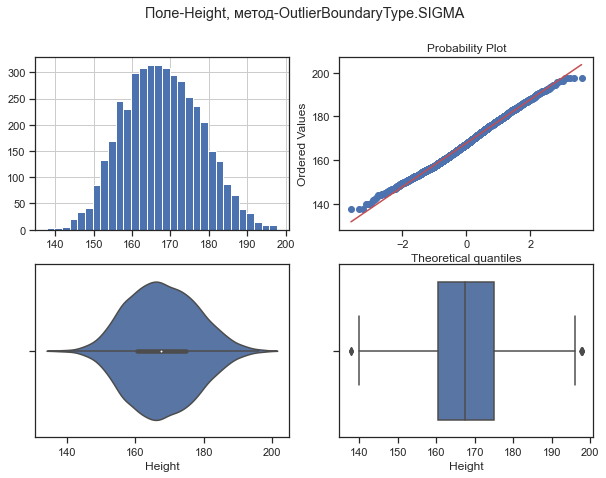

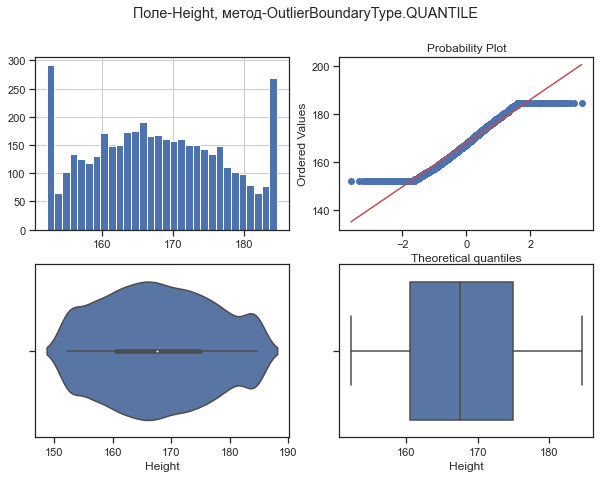

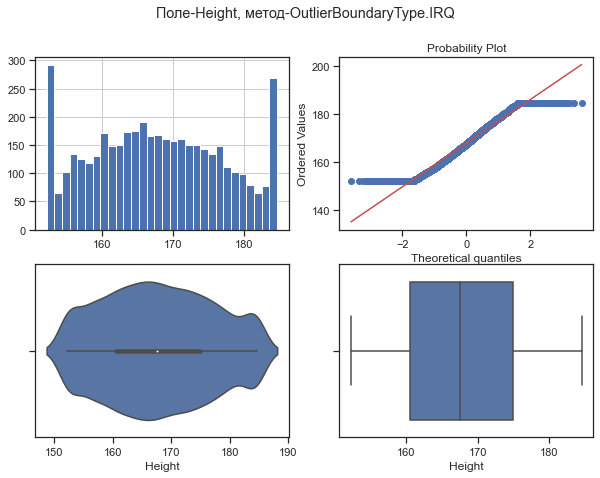

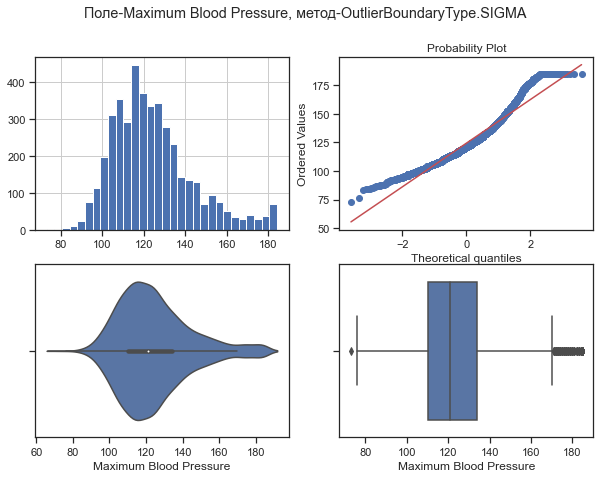

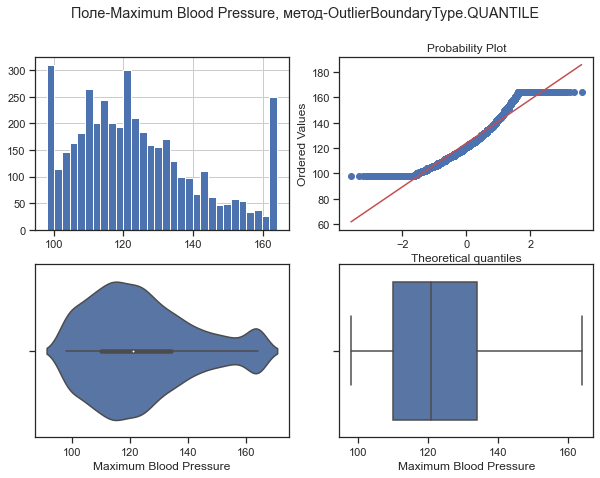

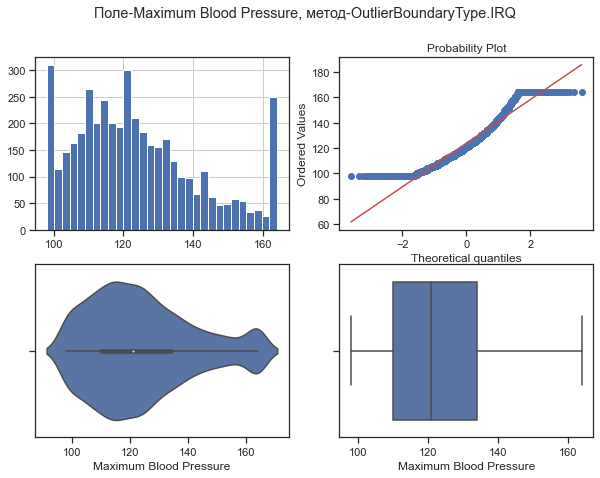

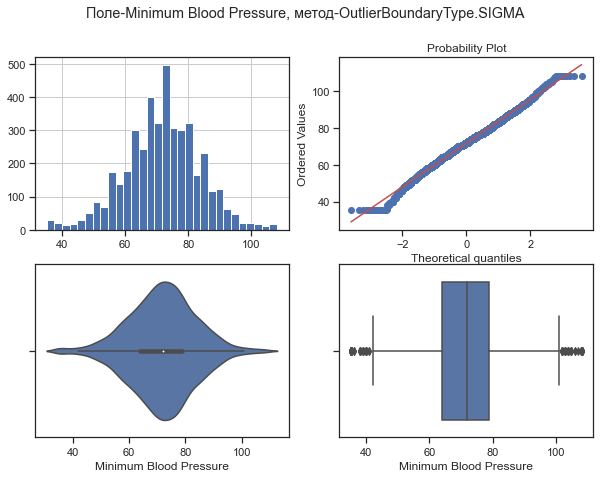

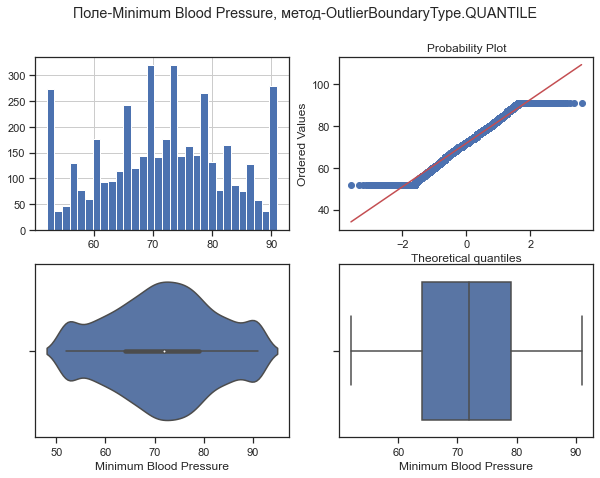

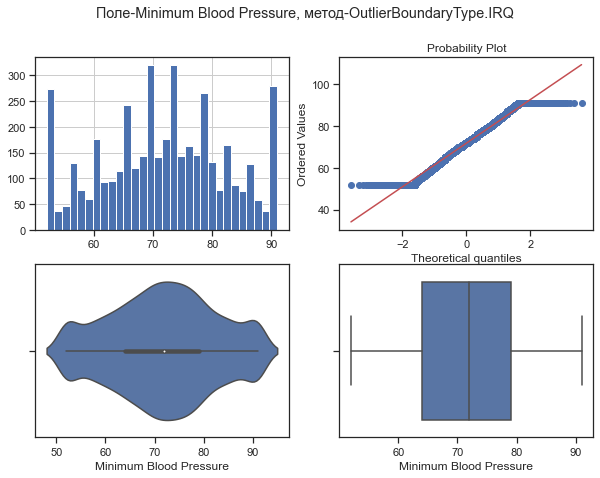

In [58]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

## Особенности формирования признаков для данных различных типов

## Загрузка и первичный анализ данных

Используем данные из соревнования [Consumer Reviews of Amazon Products.](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products)

In [70]:
# Будем использовать только обучающую выборку
df = pd.read_csv('./amazon.csv', delimiter=',')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

/var/folders/85/6b86y0kx67q7t7bbfkbkrzwh0000gn/T/ipykernel_54134/250067443.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./amazon.csv', delimiter=',')



## Обработка даты и времени

In [71]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [86]:
df = df[['reviews.date','reviews.dateAdded']]
df = df.dropna()
# Сконвертируем дату и время в нужный формат
df['reviews_time'] = df.apply(lambda x: pd.to_datetime(x['reviews.date'], format='%Y-%m-%dT%H:%M:%S'), axis=1)
df['reviews_time_added'] = df.apply(lambda x: pd.to_datetime(x['reviews.dateAdded'], format='%Y-%m-%dT%H:%M:%S'), axis=1)

In [87]:
#df[['reviews_time','reviews_time_added']].head()
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00


In [88]:
df.dtypes

reviews.date                       object
reviews.dateAdded                  object
reviews_time          datetime64[ns, UTC]
reviews_time_added    datetime64[ns, UTC]
dtype: object

### Выделение стандартных признаков даты и времени

In [89]:
# День
df['day'] = df['reviews_time_added'].dt.day
# Месяц
df['month'] = df['reviews_time_added'].dt.month
# Год
df['year'] = df['reviews_time_added'].dt.year
# Часы
df['hour'] = df['reviews_time_added'].dt.hour
#Минуты
df['minute'] = df['reviews_time_added'].dt.minute
#Секунды
df['second'] = df['reviews_time_added'].dt.second
#Неделя года
df['week'] = df['reviews_time_added'].dt.isocalendar().week
#Квартал
df['quarter'] = df['reviews_time_added'].dt.quarter
#День недели 
df['dayofweek'] = df['reviews_time_added'].dt.dayofweek
#Выходной день
df['day_name'] = df['reviews_time_added'].dt.day_name()
df['is_holiday'] = df.apply(lambda x: 1 if x['reviews_time_added'].dayofweek in [5,6] else 0, axis=1)

In [90]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,week,quarter,dayofweek,day_name,is_holiday
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0


In [91]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    df[f_new] = MinMaxScaler().fit_transform(df[[f]])
dt_features_scaled

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'week_scaled',
 'quarter_scaled',
 'dayofweek_scaled']

In [92]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,is_holiday,year_scaled,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0


### Временные интервалы

In [103]:
# Разница между датами 
utc=pytz.UTC
df['now'] = datetime.datetime.now(tz=utc)
df['diff'] = df['now'] - df['reviews_time']
df.dtypes
df['diff']

0       1949 days 17:59:21.800238
1       1949 days 17:59:21.800238
2       1949 days 17:59:21.800238
3       1949 days 17:59:21.800238
4       1950 days 17:59:21.800238
                   ...           
34622   2200 days 17:59:21.800238
34623   2141 days 17:59:21.800238
34624   2356 days 17:59:21.800238
34626   2077 days 17:59:21.800238
34628   2406 days 17:59:21.800238
Name: diff, Length: 24037, dtype: timedelta64[ns]

In [105]:
# Чтобы получить разницу между датами в заданных единицах 
# (минутах, днях и т.д.) нужно разделить timedelta64 на длительность
df['diff_days']=df['diff']/np.timedelta64(1,'D')
df.dtypes

reviews.date                       object
reviews.dateAdded                  object
reviews_time          datetime64[ns, UTC]
reviews_time_added    datetime64[ns, UTC]
day                                 int64
month                               int64
year                                int64
hour                                int64
minute                              int64
second                              int64
week                               UInt32
quarter                             int64
dayofweek                           int64
day_name                           object
is_holiday                          int64
year_scaled                       float64
day_scaled                        float64
month_scaled                      float64
hour_scaled                       float64
minute_scaled                     float64
second_scaled                     float64
week_scaled                       float64
quarter_scaled                    float64
dayofweek_scaled                  

In [106]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1950 days 17:59:21.800238,1950.749558


### Отображение на круг

Кодирование времени с помощью часов не дает представления о том, что между 23:00 и 01:00 расстояние в 2 часа. Это может помешать эффективной работе метрических алгоритмов.

Для решения проблемы час $v$ заменяется двумя признаками:

$$ t_1 = cos \Big( \frac{v \cdot 2\pi}{T} \Big) $$

$$ t_2 = sin \Big( \frac{v \cdot 2\pi}{T} \Big) $$

Значение $T$ в знаменателе формулы это период кодируемой величины. В случае кодирования часов $T=24$.

Аналогичным образом может кодироваться день, месяц и т.д. В этом случае вместо 24 часов в знаменатель формулы подставляется соответствующий период.

In [108]:
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

# Опеределим периоды для признаков
for f in dt_features:
    print(f, df[f].min(), df[f].max())

year 2016 2017
day 2 29
month 3 12
hour 0 23
minute 0 59
second 0 59
week 10 50
quarter 1 4
dayofweek 0 6


In [109]:
# периоды для признаков
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]

Год можно было закодировать с помощью one-hot encoding, но года всего два, поэтому закодируем год флагом да/нет для 2017 года.

In [111]:
df['year_round'] = df.apply(lambda x: 1 if x['year']==2017 else 0, axis=1)
dt_features_round = ['year_round']

df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days,year_round
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558,1
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558,1
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558,1
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1949 days 17:59:21.800238,1949.749558,1
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-05-16 17:59:21.800238+00:00,1950 days 17:59:21.800238,1950.749558,1


In [112]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    df[f_cos] = df.apply(lambda x: round_code(x[f], p), axis=1)
    df[f_sin] = df.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round    

CPU times: user 3.82 s, sys: 81.4 ms, total: 3.9 s
Wall time: 3.91 s


['year_round',
 'day_cos',
 'day_sin',
 'month_cos',
 'month_sin',
 'hour_cos',
 'hour_sin',
 'minute_cos',
 'minute_sin',
 'second_cos',
 'second_sin',
 'week_cos',
 'week_sin',
 'quarter_cos',
 'quarter_sin',
 'dayofweek_cos',
 'dayofweek_sin']

In [114]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0


## [Отбор признаков (Feature selection)](https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)

В соответствии с Wikipedia: «Техники отбора признаков следует отличать от выделения признаков. Выделение признаков создаёт новые признаки как функции от оригинальных признаков, в то время как отбор признаков возвращает подмножество признаков».

Таким образом, задача отбора признаков - выбрать признаки, наиболее полезные для дальнейшего построения модели.

### Методы фильтрации (filter methods)

- Методы выбирают наиболее "подходящие" признаки без использования моделей машинного обучения на основе статистических характеристик выборки (корреляция и т.д.)
- Наименее затратны с точки зрения вычислительных ресурсов.
- Могут уступать другим методам по качеству отбора признаков, потому что не учитывают зависимости между признаками.
- Хорошо подходят для начальной фильтрации признаков.

#### Простейшие методы фильтрации

##### Удаление константных и псевдоконстантных (почти константных) признаков

- Если признак содержит одинаковые (константные) значения, то он не может внести вклад в построение модели. 
- Если признак содержит почти все одинаковые (константные) значения, то скорее всего он мало полезен при построении модели. (При этом нужно быть осторожным, так как данный признак может быть индикатором одного из классов в случае классификации).
- Для поиска таких признаков можно использовать функцию `unique()`.
- Но удобнее использовать дисперсию:
    - У константного признака нулевая дисперсия.
    - У псевдоконстантного списка значение дисперсии очень мало.
- Возможно использование класса [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) из библиотеки Sklearn.

In [128]:
data_select = data_cs42_scaled_train
selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data_select)
# Значения дисперсий для каждого признака
selector_1211.variances_

array([0.34613101, 0.64398781, 0.49774153, 0.77175316, 0.21282923,
       0.59351584, 0.70061148, 0.65137127, 0.5988921 , 0.64610635,
       0.65714961, 0.08681392, 0.03565537, 0.66171751, 0.24908624,
       0.22618393, 0.2475389 , 0.05322551, 0.21033485, 0.23513392,
       0.18047923, 0.08914262, 0.21393627, 0.05527323, 0.01872721,
       0.02260593])

In [130]:
# Константный и псевдоконстантный признаки удалены
selector_1211.transform(data_select)

array([[-0.74193548, -0.84647303,  0.4084507 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38709677,  1.87966805, -0.58450704, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.12903226,  0.14937759,  1.13380282, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.32258065,  0.10788382, -0.73239437, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16129032,  0.37344398,  0.58450704, ...,  0.        ,
         1.        ,  1.        ],
       [-0.80645161, -0.42323651, -0.64788732, ...,  0.        ,
         0.        ,  0.        ]])

##### Удаление повторяющихся признаков

In [132]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [133]:
get_duplicates(data_select)

{'Age': [],
 'Weight': [],
 'Height': [],
 'Body Mass Index': [],
 'Obesity': [],
 'Waist': [],
 'Maximum Blood Pressure': [],
 'Minimum Blood Pressure': [],
 'Good Cholesterol': [],
 'Bad Cholesterol': [],
 'Total Cholesterol': [],
 'Dyslipidemia': [],
 'PVD': [],
 'Physical Activity': [],
 'Education': [],
 'Unmarried': [],
 'Income': [],
 'PoorVision': [],
 'Alcohol Consumption': [],
 'HyperTension': [],
 'Family  HyperTension': [],
 'Diabetes': [],
 'Family Diabetes': [],
 'Hepatitis': [],
 'Family Hepatitis': [],
 'Chronic Fatigue': []}

Нет повторяющихся признаков.

#### Методы, основанные на корреляции

- Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
- Важно, чтобы признаки не коррелировали между собой.

<AxesSubplot:>

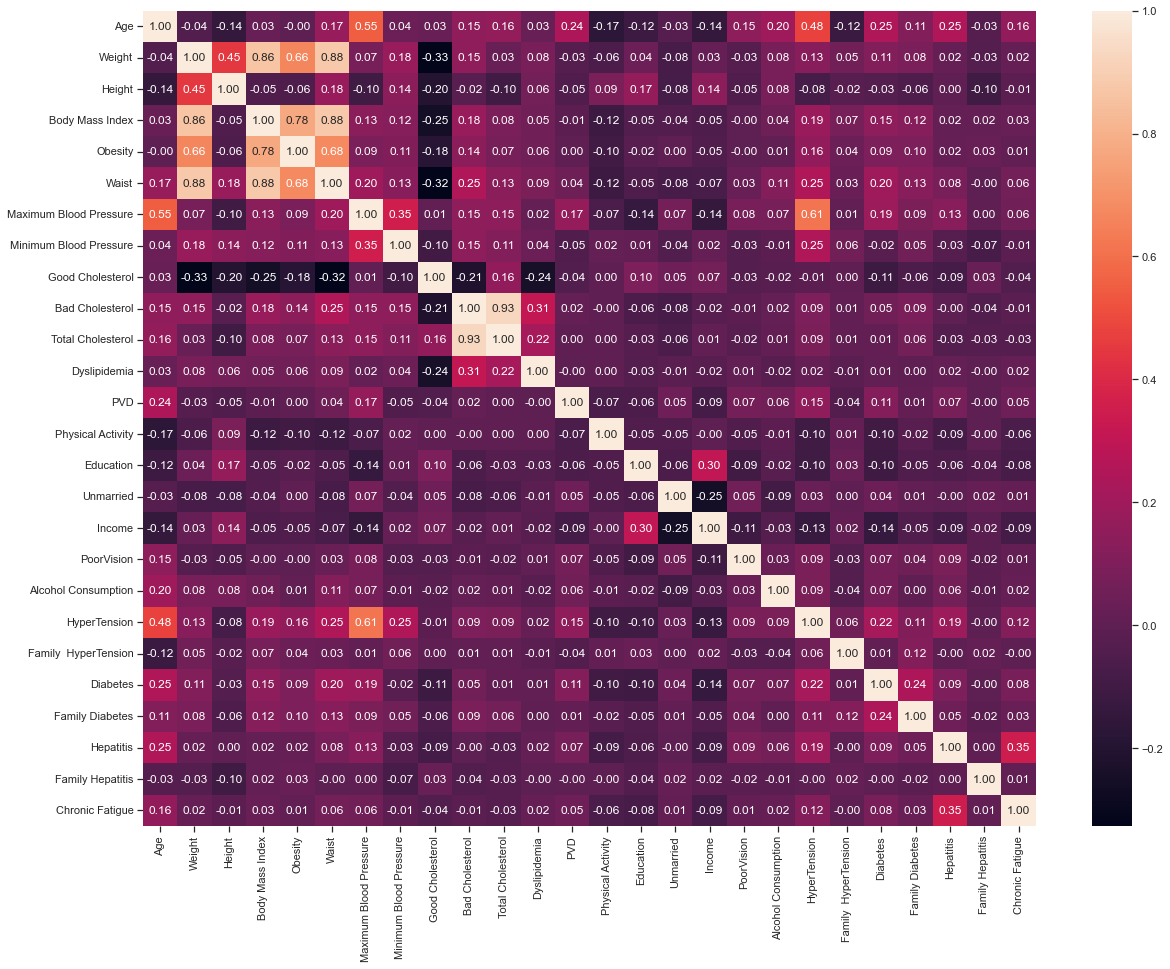

In [142]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_select.corr(), annot=True, fmt='.2f',ax=ax)

In [145]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [144]:
make_corr_df(data_select)

,f1,f2,corr
0,Total Cholesterol,Bad Cholesterol,0.929968
1,Bad Cholesterol,Total Cholesterol,0.929968
2,Waist,Weight,0.877579
3,Weight,Waist,0.877579
4,Body Mass Index,Waist,0.876687
5,Waist,Body Mass Index,0.876687
6,Body Mass Index,Weight,0.863826
7,Weight,Body Mass Index,0.863826


In [146]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Bad Cholesterol', 'Total Cholesterol'],
 ['Weight', 'Body Mass Index', 'Waist']]

#### [Методы, основанные на статистических характеристиках (univariate feature selection)](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

Используются классы:
- SelectKBest, который выбирает К лучших признаков
- SelectPercentile, который выбирает К процентов лучших признаков

Основным параметром конструктора классов является функция, которая принимает X и y, и возвращает оценки (scores), и [уровни значимости](https://ru.wikipedia.org/wiki/P-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5) (pvalues).

В качестве таких функций используются:

1. Основанные на [взаимной информации](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)
    - [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) - для классификации
    - [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) - для регрессии

1. Другие:
    - [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) - для классификации
    - [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) - для классификации
    - [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) - для регрессии

Text(0, 0.5, 'Взаимная информация')

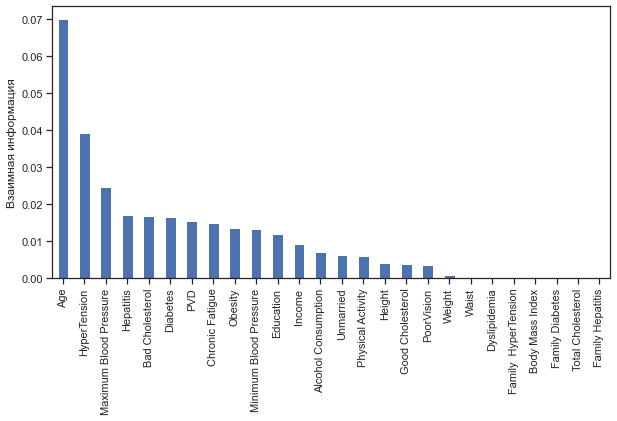

In [154]:
# DataFrame не содержащий целевой признак
data_select = data.drop(['Gender','Region','Source of Care'], axis=1)
data_select = data_select.dropna()
selectX = data_select.drop(['ALF'],axis=1)
Y = data_select['ALF']
mi = mutual_info_regression(selectX, Y)
mi = pd.Series(mi)
mi.index = selectX.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [155]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(selectX, Y)

list(zip(selectX.columns, sel_mi.get_support()))

[('Age', True),
 ('Weight', False),
 ('Height', False),
 ('Body Mass Index', False),
 ('Obesity', False),
 ('Waist', False),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', False),
 ('Good Cholesterol', False),
 ('Bad Cholesterol', False),
 ('Total Cholesterol', False),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', True),
 ('Education', False),
 ('Unmarried', False),
 ('Income', True),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', True),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

In [156]:
selectX.columns[sel_mi.get_support()]

Index(['Age', 'Maximum Blood Pressure', 'Physical Activity', 'Income',
       'HyperTension'],
      dtype='object')

### Методы обертывания (wrapper methods)

#### Алгоритмы полного перебора

- Осуществляют перебор всех комбинаций из 1, 2, ... N признаков. 
- Для каждой комбинации строится модель и оценивается метрика качества.
- Выбирается лучшая модель на основе метрики.
- По сравнению с предыдущими двумя подходами, данный подход наиболее требователен к ресурсам.

Для решения задачи используется класс [ExhaustiveFeatureSelector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/) из библиотеки MLxtend.

Параметры min_features и max_features используются для задания диапазона количества перебираемых признаков.

In [157]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [159]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(selectX[:200], Y[:200], custom_feature_names=selectX.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 3000/17875IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 7958/17875IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 13453/17875IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Notebo

Best accuracy score: 0.98
Best subset (indices): (12, 13, 18, 23)
Best subset (corresponding names): ('PVD', 'Physical Activity', 'Alcohol Consumption', 'Hepatitis')


In [161]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(selectX, Y, custom_feature_names=selectX.columns)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 351/351

Best accuracy score: 0.93
Best subset (indices): (23, 24)
Best subset (corresponding names): ('Hepatitis', 'Family Hepatitis')


### Методы вложений (embedded methods)

- Являются гибридом фильтрации и обертывания.
- Осуществляют отбор признаков на основе оценки важности признаков в процессе конструирования модели.
- По сравнению с методами обертывания, менее затратны с точки зрения вычислительных ресурсов.

#### Использование линейных моделей

##### [Логистическая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [162]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(selectX, Y)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 1.02736474e-01,  5.30762356e-02, -9.80581214e-03,
        -6.78088046e-02,  3.23526021e-01, -4.13993583e-02,
        -6.31511507e-03, -2.93839641e-03, -1.34742445e-02,
         4.77492676e-03, -8.07007876e-05, -3.66081865e-01,
         4.25060150e-01, -2.58893295e-01, -3.95623733e-02,
         4.27479579e-01,  7.89517313e-02, -1.11405354e-01,
        -1.08019417e-01,  9.12874877e-01,  1.58082978e-02,
         5.57115383e-01, -1.47717415e-01,  7.02567691e-01,
         1.24759884e+00,  2.39561066e-01]])

In [163]:

sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(selectX, Y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

##### [Линейный классификатор на основе SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [177]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=5000, dual=False)
e_lr2.fit(selectX, Y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 1.80028979e-02,  1.18059328e-02, -7.68369841e-03,
        -1.68703982e-02,  0.00000000e+00, -6.89288861e-03,
         4.21172692e-04, -2.61612258e-03, -4.27770472e-03,
         7.15142636e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.88617850e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.09619662e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [178]:
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(selectX, Y)
sel_e_lr2.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False])

##### [Линейная регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [166]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(selectX, Y)
# Коэффициенты регрессии
list(zip(selectX.columns, e_ls1.coef_))

[('Age', 0.001786201557889162),
 ('Weight', -0.0),
 ('Height', -0.0),
 ('Body Mass Index', 0.0),
 ('Obesity', 0.0),
 ('Waist', 0.0),
 ('Maximum Blood Pressure', 0.0),
 ('Minimum Blood Pressure', -0.0),
 ('Good Cholesterol', -0.0),
 ('Bad Cholesterol', 0.0),
 ('Total Cholesterol', 0.0),
 ('Dyslipidemia', -0.0),
 ('PVD', 0.0),
 ('Physical Activity', -0.0),
 ('Education', -0.0),
 ('Unmarried', 0.0),
 ('Income', -0.0),
 ('PoorVision', 0.0),
 ('Alcohol Consumption', 0.0),
 ('HyperTension', 0.0),
 ('Family  HyperTension', -0.0),
 ('Diabetes', 0.0),
 ('Family Diabetes', 0.0),
 ('Hepatitis', 0.0),
 ('Family Hepatitis', 0.0),
 ('Chronic Fatigue', 0.0)]

In [167]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(selectX, Y)
list(zip(selectX.columns, sel_e_ls1.get_support()))

[('Age', True),
 ('Weight', False),
 ('Height', False),
 ('Body Mass Index', False),
 ('Obesity', False),
 ('Waist', False),
 ('Maximum Blood Pressure', False),
 ('Minimum Blood Pressure', False),
 ('Good Cholesterol', False),
 ('Bad Cholesterol', False),
 ('Total Cholesterol', False),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

#### Использование моделей на основе решающего дерева
##### Задача классификации

In [168]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(selectX, Y)
rfc1.fit(selectX, Y)
gbc1.fit(selectX, Y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.21209688, 0.04365303, 0.08374018, 0.07893148, 0.0024881 ,
        0.09982976, 0.06297599, 0.07658452, 0.07237852, 0.0821404 ,
        0.04808031, 0.        , 0.01335757, 0.01954747, 0.01292776,
        0.00698161, 0.00331747, 0.01604746, 0.0074643 , 0.00877767,
        0.00622025, 0.01043209, 0.00684228, 0.0143656 , 0.00321153,
        0.00760776]),
 1.0)

In [169]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

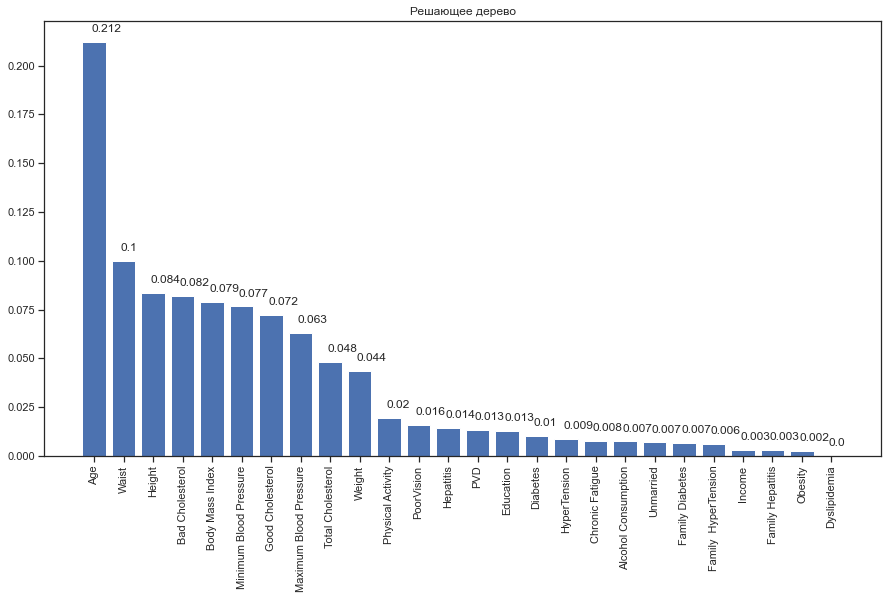

In [172]:
_,_=draw_feature_importances(dtc1, selectX, 'Решающее дерево',figsize=(15,8))

In [173]:
list(zip(selectX.columns, SelectFromModel(dtc1).fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', False),
 ('Height', True),
 ('Body Mass Index', True),
 ('Obesity', False),
 ('Waist', True),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

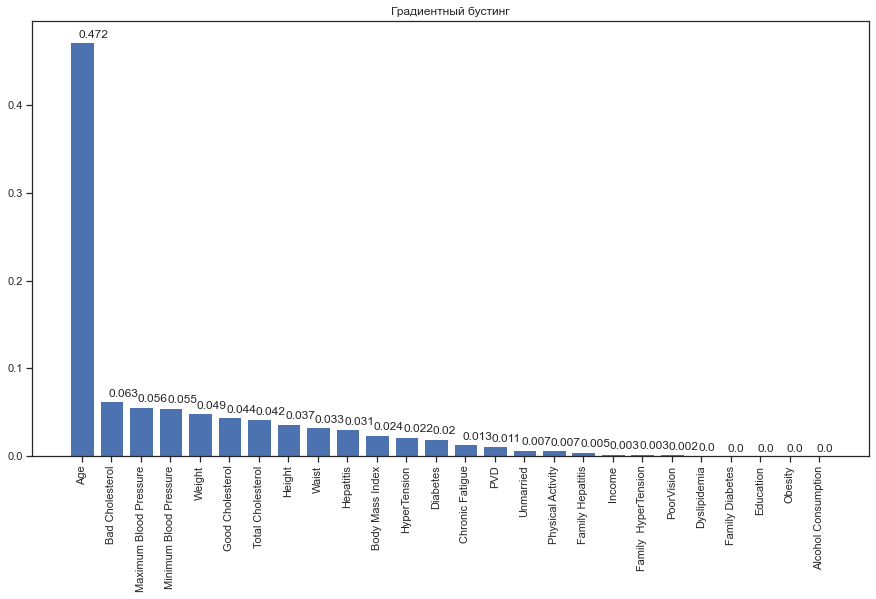

In [175]:
_,_=draw_feature_importances(gbc1, selectX, 'Градиентный бустинг',figsize=(15,8))

In [180]:
list(zip(selectX.columns, SelectFromModel(gbc1).fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', True),
 ('Height', False),
 ('Body Mass Index', False),
 ('Obesity', False),
 ('Waist', False),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

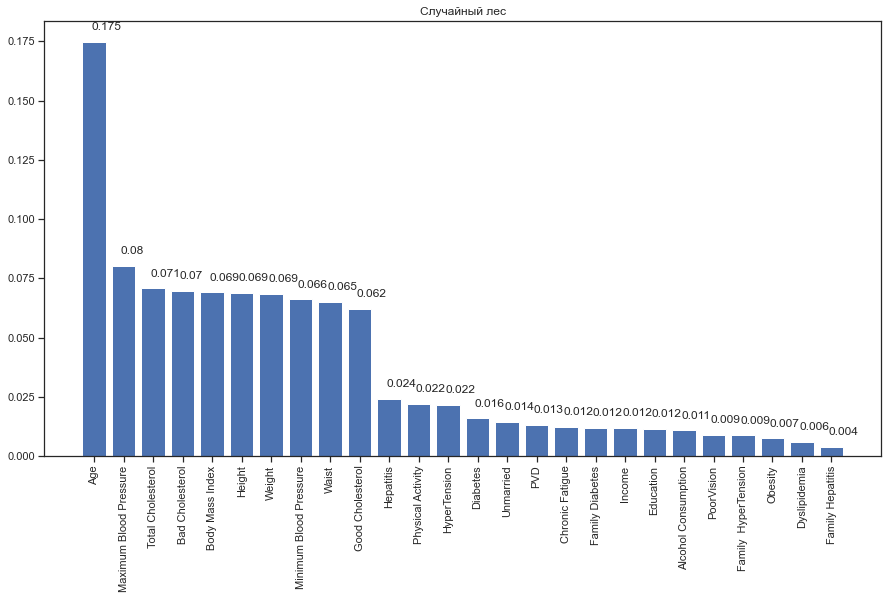

In [183]:
_,_=draw_feature_importances(rfc1, selectX, 'Случайный лес',figsize=(15,8))

In [184]:
list(zip(selectX.columns, SelectFromModel(rfc1).fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', True),
 ('Height', True),
 ('Body Mass Index', True),
 ('Obesity', False),
 ('Waist', True),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

##### Задача регрессии

In [185]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(selectX, Y)
rfr1.fit(selectX, Y)
gbr1.fit(selectX, Y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.21523293, 0.04912395, 0.07654691, 0.0608353 , 0.00699779,
        0.0983705 , 0.06313001, 0.09362256, 0.06155192, 0.08872248,
        0.04595867, 0.00447858, 0.01335757, 0.02255938, 0.01112981,
        0.01226883, 0.        , 0.01484784, 0.        , 0.00877767,
        0.00528722, 0.01167614, 0.01355058, 0.0143656 , 0.        ,
        0.00760776]),
 1.0000000000000004)

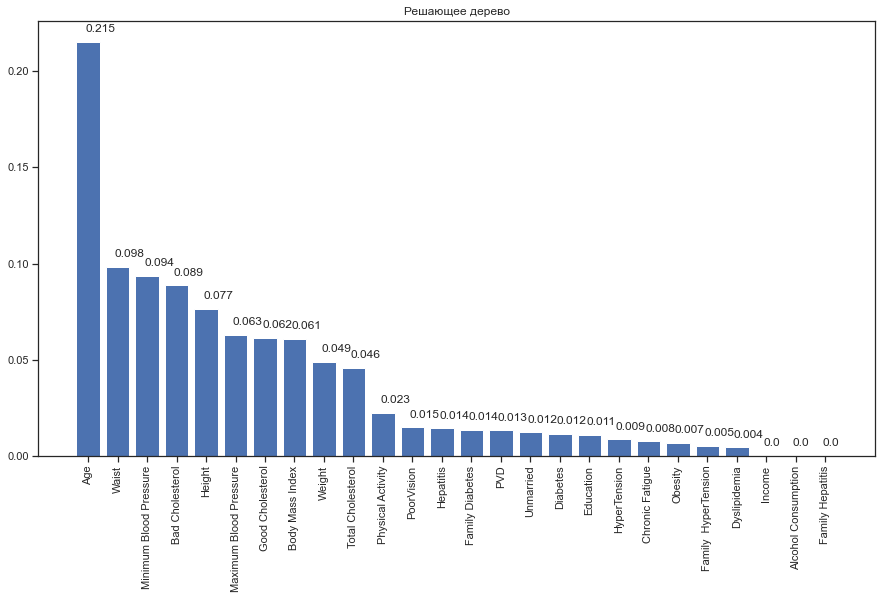

In [188]:
_,_=draw_feature_importances(dtr1, selectX, 'Решающее дерево', figsize=(15,8))

In [190]:
list(zip(selectX.columns, SelectFromModel(dtr1).fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', True),
 ('Height', True),
 ('Body Mass Index', True),
 ('Obesity', False),
 ('Waist', True),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

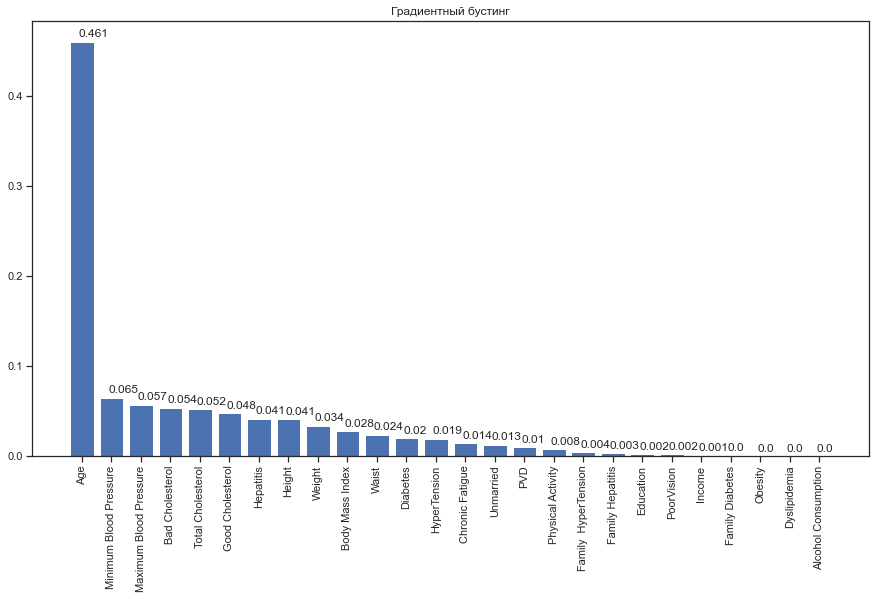

In [191]:
_,_=draw_feature_importances(gbr1, selectX, 'Градиентный бустинг', figsize=(15,8))

In [192]:
list(zip(selectX.columns, SelectFromModel(gbr1).fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', False),
 ('Height', True),
 ('Body Mass Index', False),
 ('Obesity', False),
 ('Waist', False),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', True),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

In [193]:
list(zip(selectX.columns, SelectFromModel(gbr1, threshold='0.25*mean').fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', True),
 ('Height', True),
 ('Body Mass Index', True),
 ('Obesity', False),
 ('Waist', True),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', True),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', True),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', True),
 ('Family  HyperTension', False),
 ('Diabetes', True),
 ('Family Diabetes', False),
 ('Hepatitis', True),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', True)]

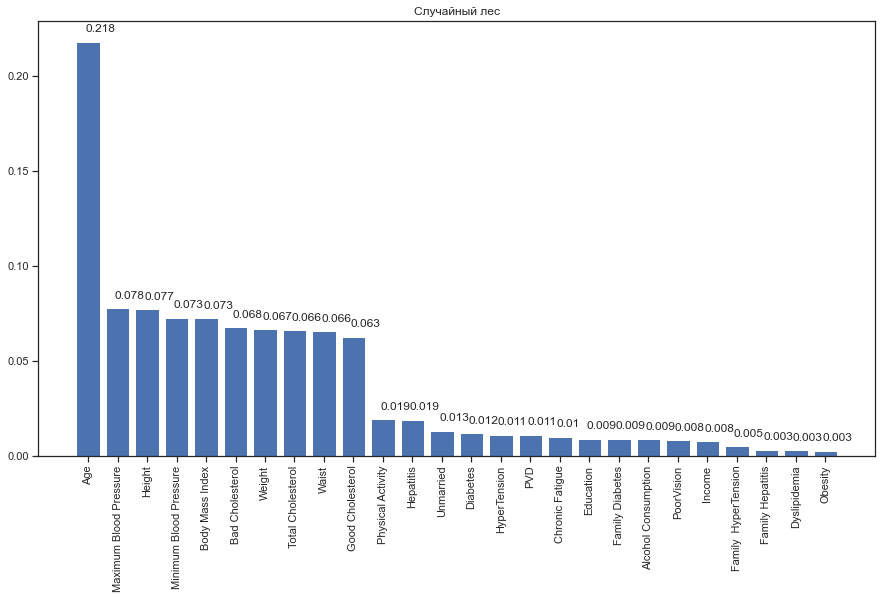

In [194]:
_,_=draw_feature_importances(rfr1, selectX, 'Случайный лес', figsize=(15,8))

In [195]:
list(zip(selectX.columns, SelectFromModel(rfr1).fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', True),
 ('Height', True),
 ('Body Mass Index', True),
 ('Obesity', False),
 ('Waist', True),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', False),
 ('PVD', False),
 ('Physical Activity', False),
 ('Education', False),
 ('Unmarried', False),
 ('Income', False),
 ('PoorVision', False),
 ('Alcohol Consumption', False),
 ('HyperTension', False),
 ('Family  HyperTension', False),
 ('Diabetes', False),
 ('Family Diabetes', False),
 ('Hepatitis', False),
 ('Family Hepatitis', False),
 ('Chronic Fatigue', False)]

In [196]:
list(zip(selectX.columns, SelectFromModel(rfr1, threshold='0.1*mean').fit(selectX, Y).get_support()))

[('Age', True),
 ('Weight', True),
 ('Height', True),
 ('Body Mass Index', True),
 ('Obesity', False),
 ('Waist', True),
 ('Maximum Blood Pressure', True),
 ('Minimum Blood Pressure', True),
 ('Good Cholesterol', True),
 ('Bad Cholesterol', True),
 ('Total Cholesterol', True),
 ('Dyslipidemia', True),
 ('PVD', True),
 ('Physical Activity', True),
 ('Education', True),
 ('Unmarried', True),
 ('Income', True),
 ('PoorVision', True),
 ('Alcohol Consumption', True),
 ('HyperTension', True),
 ('Family  HyperTension', True),
 ('Diabetes', True),
 ('Family Diabetes', True),
 ('Hepatitis', True),
 ('Family Hepatitis', True),
 ('Chronic Fatigue', True)]